##Objetivo
 - Predecir los mejores medios en los que gasta dinero en publicidad que maximicen las ventas; se utilizan la Regresión Lineal Simple y Múltiple.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [52]:
URL = 'https://raw.githubusercontent.com/Adrian-Cancino/DataScience/refs/heads/main/Data/Advertising.csv'

In [53]:
datos = pd.read_csv(URL)
datos

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [54]:
dict_columnas = {
    'TV': 'TV',
    'Radio': 'Radio',
    'Newspaper': 'Periódico',
    'Sales': 'Ventas'
}

datos.rename(columns=dict_columnas, inplace=True)
datos

,TV,Radio,Periódico,Ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [55]:
matrix_corr = datos.corr()
matrix_corr

,TV,Radio,Periódico,Ventas
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Periódico,0.056648,0.354104,1.000000,0.228299
Ventas,0.782224,0.576223,0.228299,1.000000


In [56]:
fig = px.imshow(matrix_corr, text_auto=True, labels=dict(x='Variables', y='Variables', color='Correlación'))
fig.update_layout(title='Matriz de correlación', height=800, width=800)
fig.show()

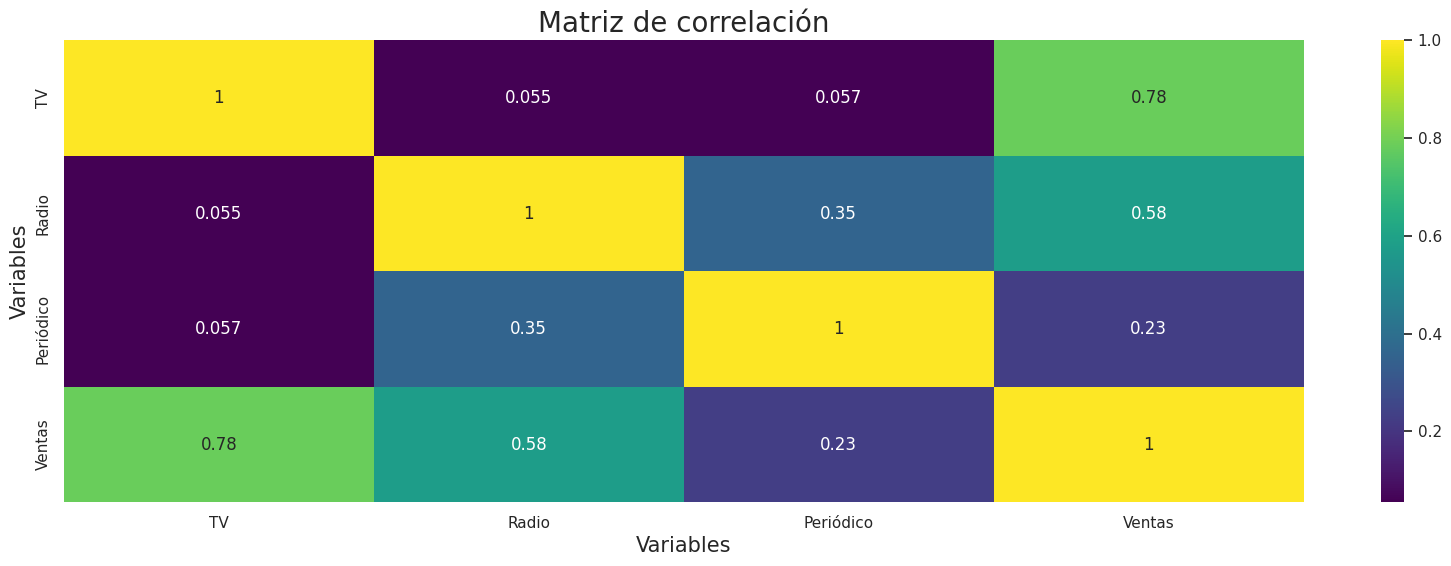

In [57]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.heatmap(data=matrix_corr, annot=True, cmap='viridis')
plt.title('Matriz de correlación', fontsize=20)
plt.xlabel('Variables', fontsize=15)
plt.ylabel('Variables', fontsize=15)
plt.show()

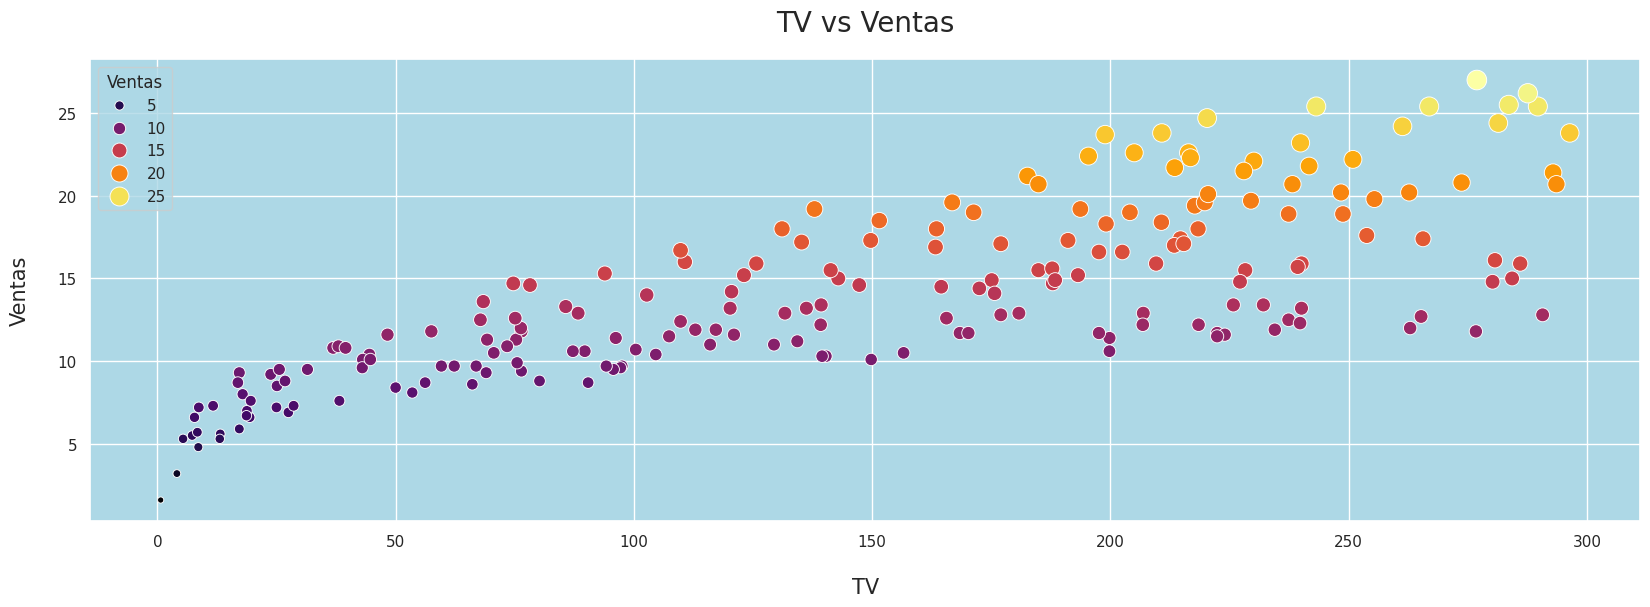

In [58]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.scatterplot(data=datos, x='TV', y='Ventas', palette='inferno', hue='Ventas', size='Ventas', sizes=(20, 200))
plt.title('TV vs Ventas', fontsize=20, pad=20)
plt.xlabel('TV', fontsize=15,labelpad=20)
plt.ylabel('Ventas', fontsize=15,labelpad=20)
plt.show()

In [59]:
fig = px.scatter(datos, x='TV', y='Ventas',
                 color='Ventas', size='Ventas',
                 color_continuous_scale='inferno',
                 size_max=20)
fig.update_layout(
    title='TV vs Ventas',
    title_font=dict(size=20),
    xaxis_title='TV',
    yaxis_title='Ventas',
    plot_bgcolor='lightblue',
    paper_bgcolor='white',
    width=1400, height=500
)
fig.show()

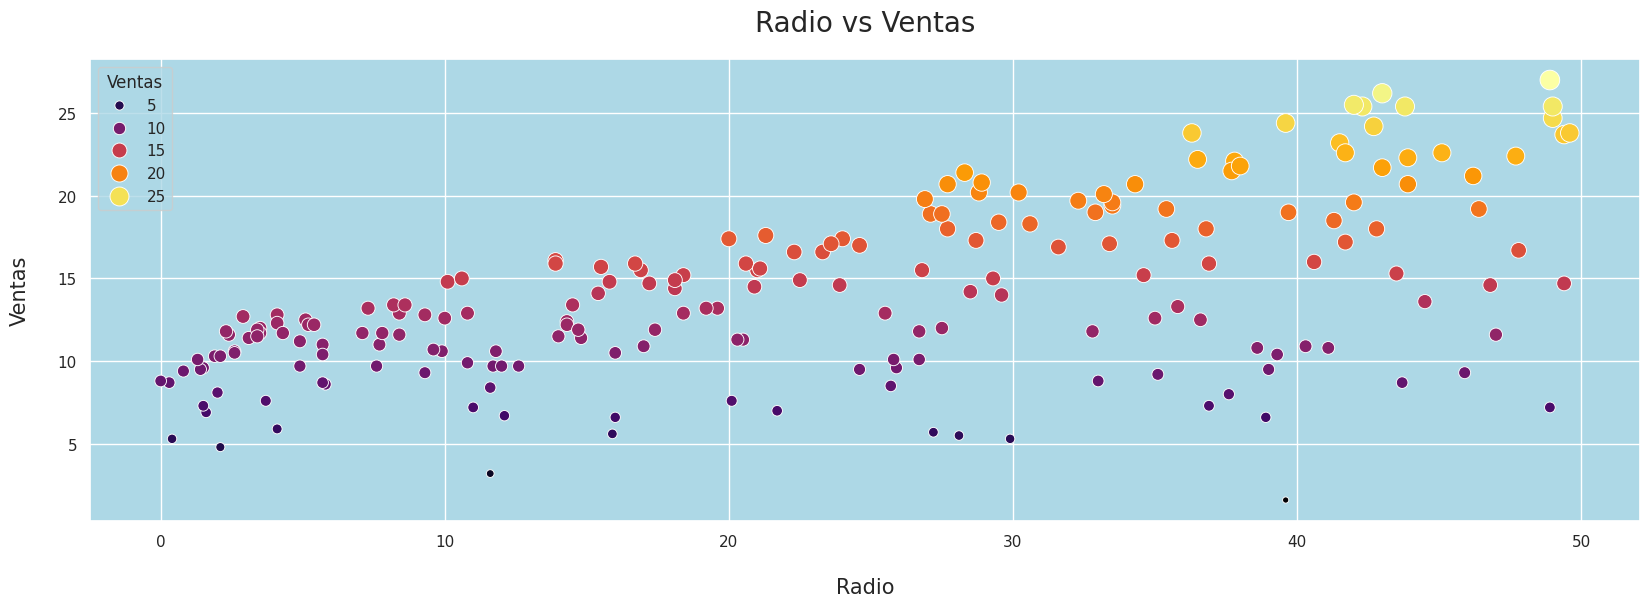

In [60]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.scatterplot(data=datos, x='Radio', y='Ventas', palette='inferno', hue='Ventas', size='Ventas', sizes=(20, 200))
plt.title('Radio vs Ventas', fontsize=20, pad=20)
plt.xlabel('Radio', fontsize=15,labelpad=20)
plt.ylabel('Ventas', fontsize=15,labelpad=20)
plt.show()

In [61]:
fig = px.scatter(datos, x='Radio', y='Ventas',
                 color='Ventas', size='Ventas',
                 color_continuous_scale='inferno',
                 size_max=20)
fig.update_layout(
    title='Radio vs Ventas',
    title_font=dict(size=20),
    xaxis_title='Radio',
    yaxis_title='Ventas',
    plot_bgcolor='lightblue',
    paper_bgcolor='white',
    width=1400, height=500
)
fig.show()

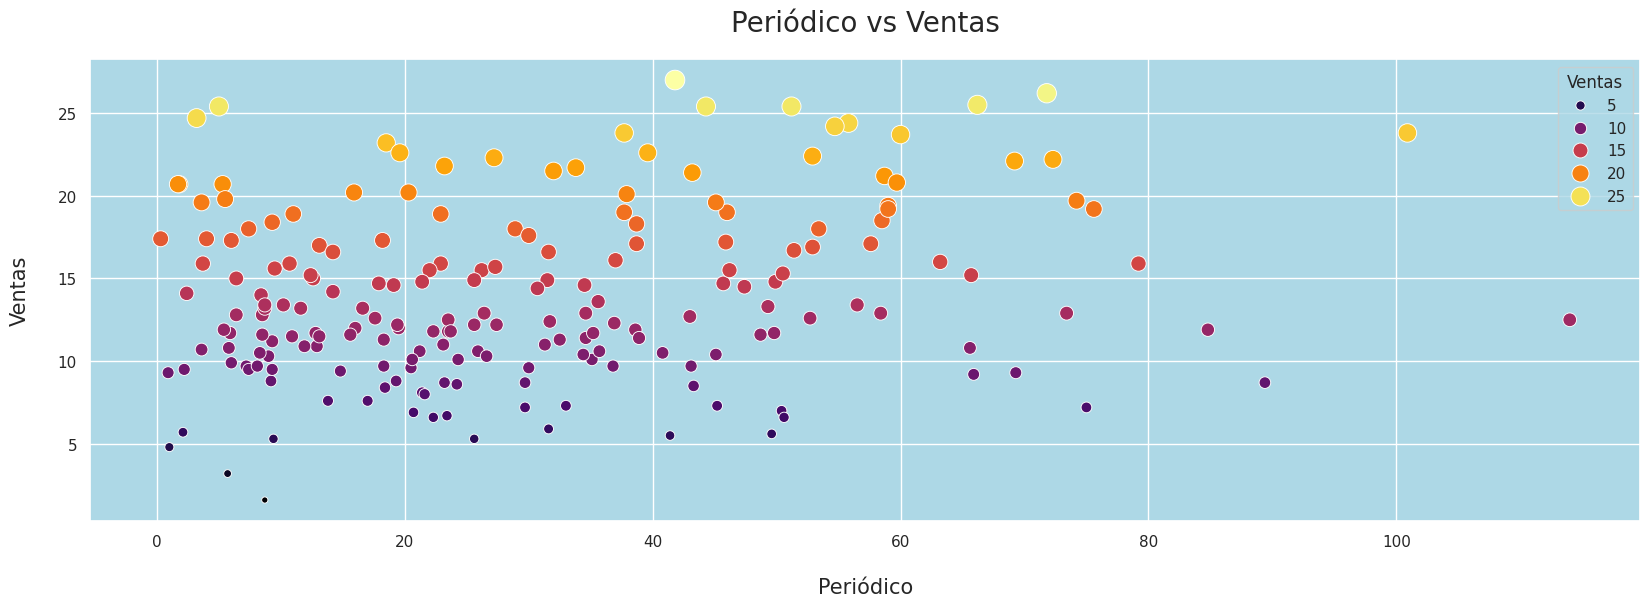

In [62]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.scatterplot(data=datos, x='Periódico', y='Ventas', palette='inferno', hue='Ventas', size='Ventas', sizes=(20, 200))
plt.title('Periódico vs Ventas', fontsize=20, pad=20)
plt.xlabel('Periódico', fontsize=15,labelpad=20)
plt.ylabel('Ventas', fontsize=15,labelpad=20)
plt.show()

In [63]:
fig = px.scatter(datos, x='Periódico', y='Ventas',
                 color='Ventas', size='Ventas',
                 color_continuous_scale='inferno',
                 size_max=20)
fig.update_layout(
    title='Periódico vs Ventas',
    title_font=dict(size=20),
    xaxis_title='Periódico',
    yaxis_title='Ventas',
    plot_bgcolor='lightblue',
    paper_bgcolor='white',
    width=1400, height=500
)
fig.show()

#Regresión simple - Modelos

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
datos_tv = datos['TV']
datos_tv = datos_tv.values.reshape(-1, 1)
datos_tv

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [66]:
y = datos['Ventas'].values

In [67]:
X_train, X_test, y_train, y_test = train_test_split(datos_tv, y, test_size=0.3, random_state=42)

In [68]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = reg.predict(X_test)
print(f'Predicciones: {y_pred[:4]}, Valores reales: {y_test[:4]}')

Predicciones: [14.81785392 16.30754437 20.83230507  7.78243112], Valores reales: [16.9 22.4 21.4  7.3]


In [70]:
r_square = reg.score(X_test, y_test)
print(f'Coeficiente de determinación: {r_square}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Raíz del error cuadrático medio: {rmse}')

Coeficiente de determinación: 0.6714477229302764
Raíz del error cuadrático medio: 2.9951613049072354


In [71]:
datos['Ventas'].min()

1.6

In [72]:
datos['Ventas'].max()

27.0

In [73]:
ventas_comp = pd.DataFrame({
    'TV': X_test.flatten(),
    'Ventas_reales': y_test.flatten(),
    'Ventas_predicción': y_pred.flatten()
})
ventas_comp.head()

,TV,Ventas_reales,Ventas_predicción
0,163.3,16.9,14.817854
1,195.4,22.4,16.307544
2,292.9,21.4,20.832305
3,11.7,7.3,7.782431
4,220.3,24.7,17.463099


##Graficando modelo junto a datos de conjunto de testing.

In [74]:
from plotly.subplots import make_subplots

In [75]:
fig = px.scatter(datos, x='Periódico', y='Ventas',
                 color='Ventas', size='Ventas',
                 color_continuous_scale='inferno',
                 size_max=20)

In [76]:
fig = px.scatter(datos, x='Periódico', y='Ventas',
                 color='Ventas', size='Ventas',
                 color_continuous_scale='inferno',
                 size_max=20)

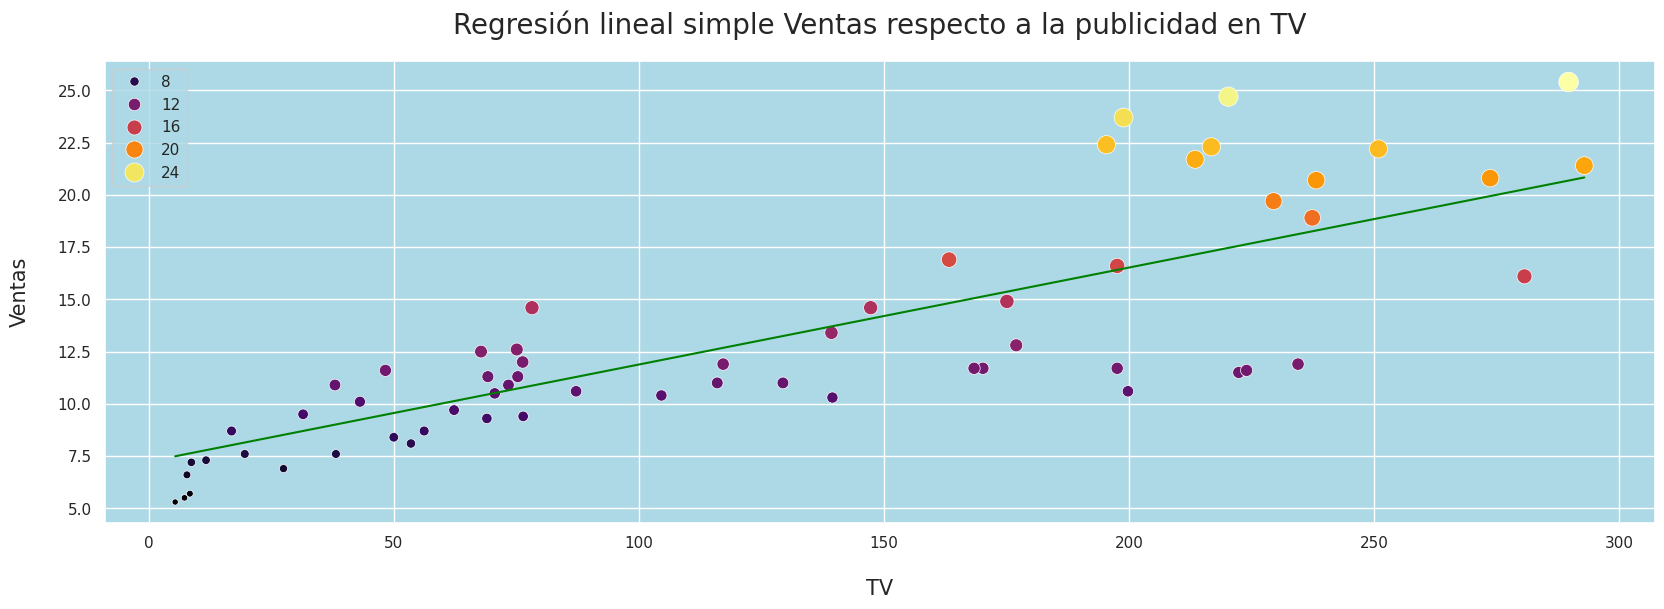

In [77]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.scatterplot(data=ventas_comp, x='TV', y='Ventas_reales', palette='inferno', hue='Ventas_reales', size='Ventas_reales', sizes=(20, 200))
sns.lineplot(data=ventas_comp, x='TV', y='Ventas_predicción', color='green')
plt.title('Regresión lineal simple Ventas respecto a la publicidad en TV', fontsize=20, pad=20)
plt.xlabel('TV', fontsize=15,labelpad=20)
plt.ylabel('Ventas', fontsize=15,labelpad=20)
plt.show()

In [78]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=X_train.flatten(), y=y_train, mode='markers', name='Conjunto de entrenamiento', marker=dict(color=y_train, size=y_train)), row=1, col=1)
fig.add_trace(go.Scatter(x=X_test.flatten(), y=reg.predict(X_test), mode='lines', name='Regresión lineal', line=dict(color='green')), row=1, col=1)
fig.update_layout(height=500, width=1500, title_text='Regresión lineal simple Ventas respecto a la publicidad en TV')
fig.show()

In [79]:
dato_radio = datos['Radio']
dato_radio = dato_radio.values.reshape(-1, 1)

In [80]:
y = datos['Ventas'].values

X_train, X_test, y_train, y_test = train_test_split(dato_radio, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f'Predicciones: {y_pred[:4]}, Valores reales: {y_test[:4]}')

Predicciones: [16.26772205 19.79791711 15.5441417  17.42983596], Valores reales: [16.9 22.4 21.4  7.3]


In [81]:
r_square = reg.score(X_test, y_test)
print(f'Coeficiente de determinación: {r_square}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Raíz del error cuadrático medio: {rmse}')

Coeficiente de determinación: 0.13116693684196756
Raíz del error cuadrático medio: 4.870641281862208


In [82]:
ventas_comp = pd.DataFrame({
    'Radio': X_test.flatten(),
    'Ventas_reales': y_test.flatten(),
    'Ventas_predicción': y_pred.flatten()
})
ventas_comp.head()

,Radio,Ventas_reales,Ventas_predicción
0,31.6,16.9,16.267722
1,47.7,22.4,19.797917
2,28.3,21.4,15.544142
3,36.9,7.3,17.429836
4,49.0,24.7,20.082964


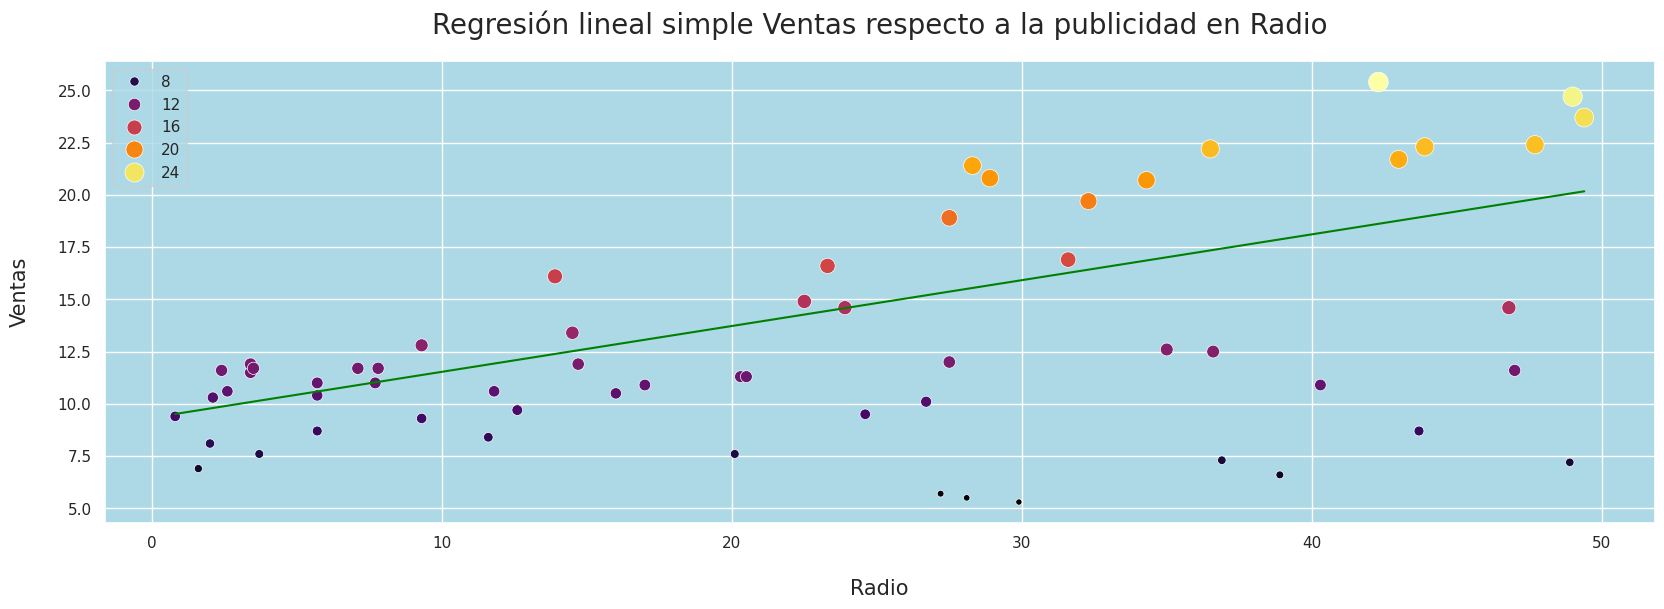

In [83]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.scatterplot(data=ventas_comp, x='Radio', y='Ventas_reales', palette='inferno', hue='Ventas_reales', size='Ventas_reales', sizes=(20, 200))
sns.lineplot(data=ventas_comp, x='Radio', y='Ventas_predicción', color='green')
plt.title('Regresión lineal simple Ventas respecto a la publicidad en Radio', fontsize=20, pad=20)
plt.xlabel('Radio', fontsize=15,labelpad=20)
plt.ylabel('Ventas', fontsize=15,labelpad=20)
plt.show()

In [84]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=X_train.flatten(), y=y_train, mode='markers', name='Conjunto de entrenamiento', marker=dict(color=y_train, size=y_train)), row=1, col=1)
fig.add_trace(go.Scatter(x=X_test.flatten(), y=reg.predict(X_test), mode='lines', name='Regresión lineal', line=dict(color='green')), row=1, col=1)
fig.update_layout(height=500, width=1500, title_text='Regresión lineal simple Ventas respecto a la publicidad en Radio')
fig.show()

In [85]:
datos_periodico = datos['Periódico']
datos_periodico = datos_periodico.values.reshape(-1, 1)

In [86]:
y = datos['Ventas'].values

X_train, X_test, y_train, y_test = train_test_split(datos_periodico, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f'Predicciones: {y_pred[:4]}, Valores reales: {y_test[:4]}')

Predicciones: [15.86524548 15.86524548 15.27418406 15.39605239], Valores reales: [16.9 22.4 21.4  7.3]


In [87]:
r_square = reg.score(X_test, y_test)
print(f'Coeficiente de determinación: {r_square}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Raíz del error cuadrático medio: {rmse}')

Coeficiente de determinación: -0.057301173788661064
Raíz del error cuadrático medio: 5.373006089766974


In [88]:
ventas_comp = pd.DataFrame({
    'Periódico': X_test.flatten(),
    'Ventas_reales': y_test.flatten(),
    'Ventas_predicción': y_pred.flatten()
})
ventas_comp.head()

,Periódico,Ventas_reales,Ventas_predicción
0,52.9,16.9,15.865245
1,52.9,22.4,15.865245
2,43.2,21.4,15.274184
3,45.2,7.3,15.396052
4,3.2,24.7,12.836817


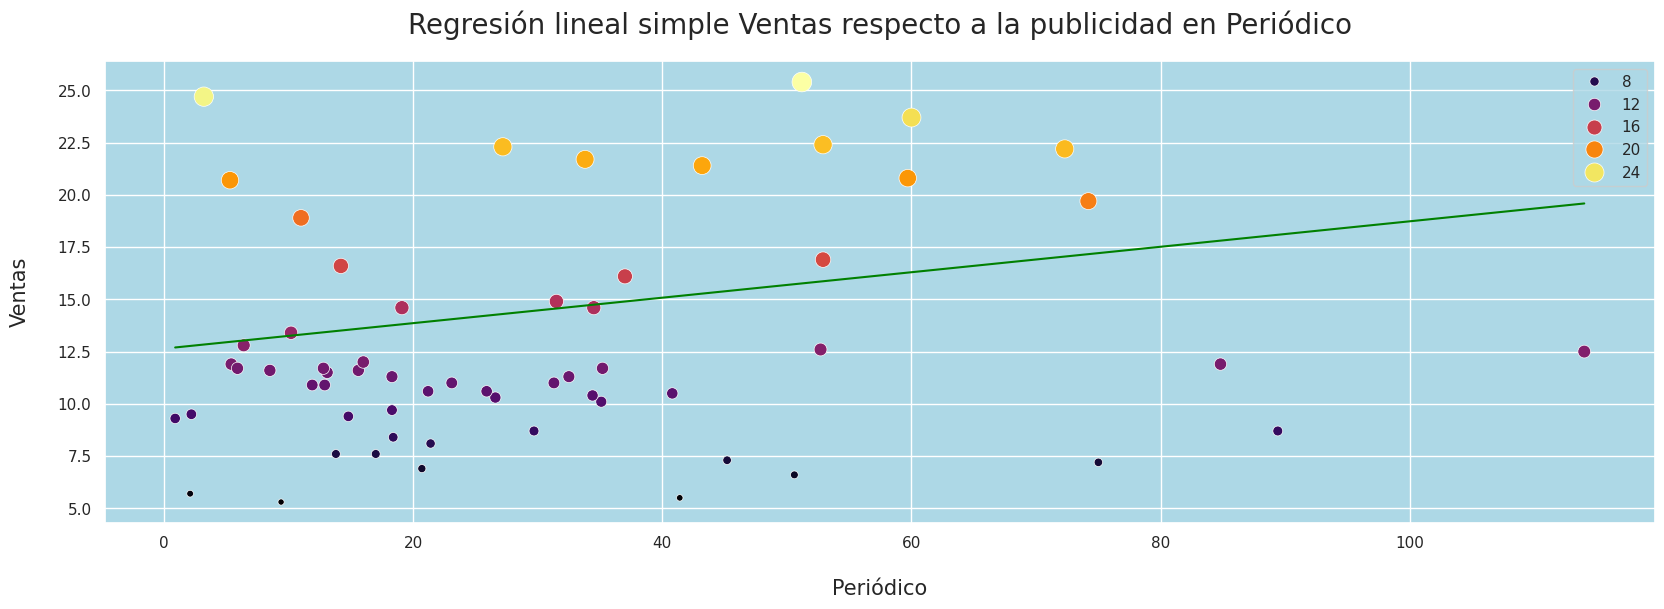

In [89]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.scatterplot(data=ventas_comp, x='Periódico', y='Ventas_reales', palette='inferno', hue='Ventas_reales', size='Ventas_reales', sizes=(20, 200))
sns.lineplot(data=ventas_comp, x='Periódico', y='Ventas_predicción', color='green')
plt.title('Regresión lineal simple Ventas respecto a la publicidad en Periódico', fontsize=20, pad=20)
plt.xlabel('Periódico', fontsize=15,labelpad=20)
plt.ylabel('Ventas', fontsize=15,labelpad=20)
plt.show()

In [90]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=X_train.flatten(), y=y_train, mode='markers', name='Conjunto de entrenamiento', marker=dict(color=y_train, size=y_train)), row=1, col=1)
fig.add_trace(go.Scatter(x=X_test.flatten(), y=reg.predict(X_test), mode='lines', name='Regresión lineal', line=dict(color='green')), row=1, col=1)
fig.update_layout(height=500, width=1500, title_text='Regresión lineal simple Ventas respecto a la publicidad en Periódico')
fig.show()

##Modelos de regresión multiple

In [91]:
X = datos.drop(['Radio','Ventas'], axis=1).values
y = datos['Ventas'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f'Predicciones: {y_pred[:4]}, Valores reales: {y_test[:4]}')

Predicciones: [16.04429782 17.51962128 21.46954703  8.65505487], Valores reales: [16.9 22.4 21.4  7.3]


In [92]:
r_square = reg.score(X_test, y_test)
print(f'Coeficiente de determinación: {r_square}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Raíz del error cuadrático medio: {rmse}')

Coeficiente de determinación: 0.668935545006016
Raíz del error cuadrático medio: 3.0065903074245406


TV-Radio

In [93]:
X = datos.drop(['Periódico','Ventas'], axis=1).values
y = datos['Ventas'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f'Predicciones: {y_pred[:4]}, Valores reales: {y_test[:4]}')

Predicciones: [16.43778963 21.11462413 21.48161733 10.82947123], Valores reales: [16.9 22.4 21.4  7.3]


In [94]:
r_square = reg.score(X_test, y_test)
print(f'Coeficiente de determinación: {r_square}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Raíz del error cuadrático medio: {rmse}')

Coeficiente de determinación: 0.8656253548947075
Raíz del error cuadrático medio: 1.9154756731764253


In [108]:
ventas_comp = pd.DataFrame({
    'TV': X_test[:, 0].flatten(),
    'Radio': X_test[:, 1].flatten(),
    'Ventas_reales': y_test.flatten(),
    'Ventas_predicción': y_pred.flatten()
})
ventas_comp.head()

,TV,Radio,Ventas_reales,Ventas_predicción
0,163.3,31.6,16.9,16.437790
1,195.4,47.7,22.4,21.114624
2,292.9,28.3,21.4,21.481617
3,11.7,36.9,7.3,10.829471
4,220.3,49.0,24.7,22.475538


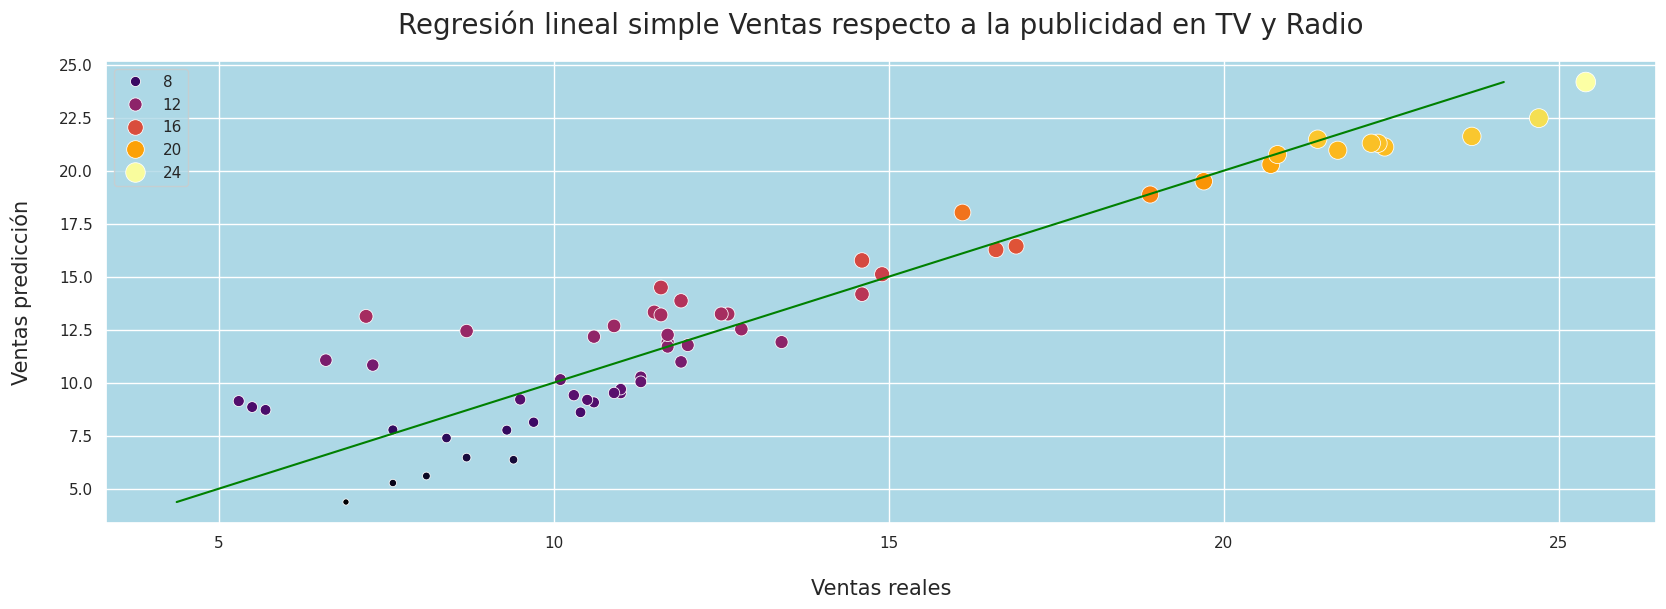

In [132]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.scatterplot(data=ventas_comp, x=ventas_comp['Ventas_reales'], y=ventas_comp['Ventas_predicción'], palette='inferno', hue=ventas_comp['Ventas_predicción'], size=ventas_comp['Ventas_predicción'], sizes=(20, 200))
sns.lineplot(data=ventas_comp, x=ventas_comp['Ventas_predicción'], y=ventas_comp['Ventas_predicción'], color='green')
plt.title('Regresión lineal simple Ventas respecto a la publicidad en TV y Radio', fontsize=20, pad=20)
plt.xlabel('Ventas reales', fontsize=15,labelpad=20)
plt.ylabel('Ventas predicción', fontsize=15,labelpad=20)
plt.show()

In [148]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=ventas_comp['Ventas_reales'], y=ventas_comp['Ventas_predicción'], mode='markers', name='Conjunto de entrenamiento', marker=dict(color=ventas_comp['Ventas_predicción'], size=ventas_comp['Ventas_predicción'])), row=1, col=1)
fig.add_trace(go.Scatter(x=ventas_comp['Ventas_predicción'], y=reg.predict(X_test), mode='lines', name='Regresión lineal', line=dict(color='green')), row=1, col=1)
fig.update_layout(height=500, width=1500, title_text='Regresión lineal simple Ventas respecto a la publicidad en TV y Radio')
fig.show()

# Informe de Análisis de Publicidad

## Introducción

El objetivo de este análisis fue determinar cuáles son los medios publicitarios más efectivos para maximizar las ventas. Para ello, utilicé modelos de regresión lineal simple y múltiple, analizando el impacto de la inversión en TV, radio y periódicos sobre las ventas.

## Análisis Exploratorio de Datos

Para este estudio, trabajé con un conjunto de datos que contiene información sobre la inversión en publicidad en diferentes medios y las ventas obtenidas. Apliqué técnicas de exploración de datos para comprender mejor las relaciones entre las variables:

- Cálculo de la matriz de correlación para identificar la relación entre las variables.
- Visualización de dispersión entre la inversión en cada medio publicitario y las ventas.
- Mapas de calor para ilustrar la fuerza de las correlaciones.

Los resultados indicaron que la inversión en TV tiene la correlación más alta con las ventas, seguida de la radio, mientras que la inversión en periódico tiene una relación más débil.

## Modelado Predictivo

Apliqué modelos de regresión lineal para cuantificar la relación entre la inversión publicitaria y las ventas:

1. **Regresión Lineal Simple:**

   - Se entrenó un modelo con cada variable independiente por separado.
   - Se observó que la TV tiene el coeficiente más alto, lo que indica que su impacto en las ventas es significativo.

2. **Regresión Lineal Múltiple:**

   - Se entrenó un modelo considerando todas las variables.
   - Se obtuvo un modelo con mejor capacidad predictiva que los modelos simples.

## Conclusiones

Los hallazgos de este análisis confirman que la inversión en TV es el factor más determinante para aumentar las ventas. La radio también juega un papel relevante, mientras que la publicidad en periódicos tiene menor impacto.

Este análisis proporciona información clave para optimizar la asignación de presupuestos en publicidad, maximizando el retorno de inversión.

Simple-Poderoso.
